In [11]:
from ultralytics import YOLO
import supervision as sv

In [12]:
# Load a model
model = YOLO("best.pt") 

from supervision import VideoInfo
from supervision import VideoSink

TARGET_VIDEO_PATH = 'runs/detect/vehicle_counting_long.mp4'
video_info = VideoInfo.from_video_path('datasets/data/images/1206.mp4')

In [13]:
generator = sv.get_video_frames_generator('datasets/data/images/12007.mp4')

In [14]:
from tqdm.notebook import tqdm

In [15]:
from collections import defaultdict
from supervision.draw.color import ColorPalette
import cv2

box_annotator = sv.BoxAnnotator(color=ColorPalette.default(), thickness=4, text_thickness=4, text_scale=2)
# START2 = sv.Point(700, 1300)
# END2 = sv.Point(2560, 360)
START = sv.Point(800, 360)
END = sv.Point(1800, 1440)
# line_zone2 = sv.LineZone(start=START2, end=END2)
# line_zone_annotator2 = sv.LineZoneAnnotator(thickness=4, text_thickness=4, text_scale=2, custom_in_text="Car in", custom_out_text="Car out")
line_zone_Car = sv.LineZone(start=START, end=END)
line_zone_annotator_Car = sv.LineZoneAnnotator(thickness=2, text_thickness=2, text_scale=1,text_offset=4,text_padding=10, custom_in_text="Car in", custom_out_text="Car out")
line_zone_Moter = sv.LineZone(start=START, end=END)
line_zone_annotator_Moter = sv.LineZoneAnnotator(thickness=2, text_thickness=2, text_scale=1, custom_in_text="Moter in", custom_out_text="Moter out")

trackers__ = []
class_counts = {'car': 0, 'motercycle': 0, 'bus': 0}  # Use lowercase names

with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    for frame in tqdm(generator, total=video_info.total_frames):
        results = model.track(frame, persist=True)[0]

        detections = sv.Detections(
            xyxy=results.boxes.xyxy.cpu().numpy(),
            confidence=results.boxes.conf.cpu().numpy(),
            class_id=results.boxes.cls.cpu().numpy().astype(int),
            tracker_id=results.boxes.id.cpu().numpy().astype(int)
        )

        labels = []
        for detection in detections:
            class_id = detection[3]
            confidence = detection[2]
            tracker_id = detection[4]
            label = model.model.names[class_id]
            labels.append(f"{tracker_id} {label} ")
            # Count only if the object hasn't been counted before
            if tracker_id not in trackers__:
                # print(label)
                if label.lower() == 'car':
                    class_counts['car'] += 1
                elif label.lower() == 'motercycle':
                    class_counts['motercycle'] += 1
                elif label.lower() == 'bus':
                    class_counts['bus'] += 1
                trackers__.append(tracker_id)

        frame = box_annotator.annotate(frame, detections=detections, labels=labels)
        detections_0 = detections[detections.class_id == 0]
        detections_3 = detections[detections.class_id == 3]
        line_zone_Car.trigger(detections_0)
        line_zone_annotator_Car.annotate(frame=frame, line_counter=line_zone_Car)
        line_zone_Moter.trigger(detections_3)
        line_zone_annotator_Moter.annotate(frame=frame, line_counter=line_zone_Moter)
        # line_zone2.trigger(detections_0)
        # line_zone_annotator2.annotate(frame=frame, line_counter=line_zone2)
        # Add text overlay for class counts
        count_text = "\n".join(f"{label}: {count}" for label, count in class_counts.items())
        # count_text = "\n".join(f"{class_counts[tracker_id]}: {len(class_counts)}" for tracker_id in class_counts)
        cv2.putText(frame, count_text, (10, 1300), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        # print(trackers__)
        print("Class Counts:", dict(class_counts))
        sink.write_frame(frame)


  0%|          | 0/3798 [00:00<?, ?it/s]


0: 384x640 4 Cars, 5 Motercycles, 148.8ms
Speed: 6.8ms preprocess, 148.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)
Class Counts: {'car': 4, 'motercycle': 5, 'bus': 0}

0: 384x640 4 Cars, 5 Motercycles, 178.2ms
Speed: 4.7ms preprocess, 178.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
Class Counts: {'car': 4, 'motercycle': 5, 'bus': 0}

0: 384x640 4 Cars, 5 Motercycles, 179.2ms
Speed: 5.8ms preprocess, 179.2ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)
Class Counts: {'car': 4, 'motercycle': 5, 'bus': 0}

0: 384x640 4 Cars, 5 Motercycles, 161.9ms
Speed: 7.5ms preprocess, 161.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Class Counts: {'car': 4, 'motercycle': 5, 'bus': 0}

0: 384x640 4 Cars, 4 Motercycles, 156.5ms
Speed: 4.7ms preprocess, 156.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)
Class Counts: {'car': 4, 'motercycle': 5, 'bus': 0}

0: 384x640 4 Cars, 4 Motercycles, 

In [139]:
from supervision.draw.color import ColorPalette
box_annotator = sv.BoxAnnotator(color = ColorPalette.default(), thickness=4, text_thickness=4, text_scale=2)

# iterator = iter(generator)
# frame = next(iterator)
START2 = sv.Point(700,1300)
END2 = sv.Point(2560,360)
START = sv.Point(800,360)
END = sv.Point(1800,1440)
line_zone2 = sv.LineZone(start=START2, end=END2)
line_zone_annotator2 = sv.LineZoneAnnotator(thickness=4, text_thickness=4, text_scale=2)
line_zone = sv.LineZone(start=START, end=END)
line_zone_annotator = sv.LineZoneAnnotator(thickness=4, text_thickness=4, text_scale=2)
with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    for frame in tqdm(generator, total=video_info.total_frames):
        results = model.track(frame,persist=True)[0]
        # print(results.boxes.cls)
        
        detections = sv.Detections(
            xyxy = results.boxes.xyxy.cpu().numpy(),
            confidence = results.boxes.conf.cpu().numpy(),
            class_id = results.boxes.cls.cpu().numpy().astype(int),
            tracker_id = results.boxes.id.cpu().numpy().astype(int)
        )
        # print(detections)
        # print(model.model.names)
        # labels = [
        #     f"{model.model.names[class_id]} {confidence:0.2f}"
        #     for _,confidence, class_id in detections
        # ]
        labels = []
        for detection in detections:
                # print(detection)
                # print(detection[4])
            # if len(detection) >= 3:
                class_id = detection[3]
                confidence = detection[2]
                tracker_id = detection[4]
                label = model.model.names[class_id]
                labels.append(f"{tracker_id} {label} ")
        
        frame = box_annotator.annotate(frame, detections=detections, labels=labels)
        line_zone.trigger(detections)
        line_zone_annotator.annotate(frame=frame, line_counter=line_zone)
        line_zone2.trigger(detections)
        line_zone_annotator2.annotate(frame=frame, line_counter=line_zone2)
        # print(type(frame))
        # sv.plot_image(frame, (16,16))
        sink.write_frame(frame)

  0%|          | 0/5064 [00:00<?, ?it/s]


0: 384x640 4 Cars, 3 Motercycles, 83.8ms
Speed: 3.0ms preprocess, 83.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 Cars, 3 Motercycles, 87.7ms
Speed: 2.8ms preprocess, 87.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 Cars, 4 Motercycles, 88.5ms
Speed: 0.0ms preprocess, 88.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 Cars, 4 Motercycles, 81.3ms
Speed: 0.0ms preprocess, 81.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 Cars, 3 Motercycles, 81.0ms
Speed: 0.0ms preprocess, 81.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 Cars, 3 Motercycles, 85.1ms
Speed: 3.0ms preprocess, 85.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 Cars, 3 Motercycles, 80.5ms
Speed: 0.0ms preprocess, 80.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 Cars, 3 Moter


0: 384x640 4 Cars, 5 Motercycles, 94.0ms
Speed: 4.5ms preprocess, 94.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


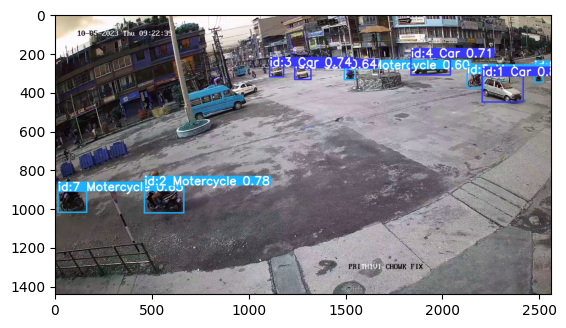

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1338: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [36]:
import cv2
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('best.pt')

# Open the video file
video_path = "datasets/data/images/12007.mp4"
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 tracking on the frame, persisting tracks between frames
        results = model.track(frame, persist=True)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2.imwrite('annotated_frame.jpg', annotated_frame)

        # Or use matplotlib for display
        import matplotlib.pyplot as plt
        plt.imshow(annotated_frame)
        plt.show()
        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

In [144]:
from collections import defaultdict

# ... (existing code)

# Initialize a dictionary to store class counts
class_counts = defaultdict(int)

with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    for frame in tqdm(generator, total=video_info.total_frames):
        results = model.track(frame, persist=True)[0]

        detections = sv.Detections(
            xyxy=results.boxes.xyxy.cpu().numpy(),
            confidence=results.boxes.conf.cpu().numpy(),
            class_id=results.boxes.cls.cpu().numpy().astype(int),
            tracker_id=results.boxes.id.cpu().numpy().astype(int)
        )

        labels = []
        for detection in detections:
            class_id = detection[3]
            confidence = detection[2]
            tracker_id = detection[4]
            label = model.model.names[class_id]
            labels.append(f"{tracker_id} {label} ")

            # Update class counts
            class_counts[label] += 1

        frame = box_annotator.annotate(frame, detections=detections, labels=labels)
        line_zone.trigger(detections)
        line_zone_annotator.annotate(frame=frame, line_counter=line_zone)
        line_zone2.trigger(detections)
        line_zone_annotator2.annotate(frame=frame, line_counter=line_zone2)

        # Print or use class counts as needed
        print("Class Counts:", dict(class_counts))

        sink.write_frame(frame)


  0%|          | 0/380 [00:00<?, ?it/s]


0: 384x640 4 Cars, 1 Motercycle, 86.0ms
Speed: 3.5ms preprocess, 86.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Class Counts: {'Car': 4, 'Motercycle': 1}

0: 384x640 4 Cars, 1 Motercycle, 91.5ms
Speed: 3.5ms preprocess, 91.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Class Counts: {'Car': 8, 'Motercycle': 2}

0: 384x640 4 Cars, 2 Motercycles, 74.8ms
Speed: 4.2ms preprocess, 74.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Class Counts: {'Car': 12, 'Motercycle': 4}

0: 384x640 4 Cars, 2 Motercycles, 89.2ms
Speed: 0.0ms preprocess, 89.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
Class Counts: {'Car': 16, 'Motercycle': 6}

0: 384x640 5 Cars, 2 Motercycles, 74.5ms
Speed: 0.0ms preprocess, 74.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Class Counts: {'Car': 21, 'Motercycle': 8}

0: 384x640 5 Cars, 3 Motercycles, 82.8ms
Speed: 3.5ms preprocess, 82.8ms inference, 1.1ms pos

In [150]:
from collections import defaultdict

# ... (existing code)

# Initialize a dictionary to store class counts
class_counts = defaultdict(int)

with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    for frame in tqdm(generator, total=video_info.total_frames):
        results = model.track(frame, persist=True)[0]

        detections = sv.Detections(
            xyxy=results.boxes.xyxy.cpu().numpy(),
            confidence=results.boxes.conf.cpu().numpy(),
            class_id=results.boxes.cls.cpu().numpy().astype(int),
            tracker_id=results.boxes.id.cpu().numpy().astype(int)
        )

        labels = []
        for detection in detections:
            class_id = detection[3]
            confidence = detection[2]
            tracker_id = detection[4]
            label = model.model.names[class_id]
            labels.append(f"{tracker_id} {label} ")

            # Update class counts
            class_counts[label] += 1

        frame = box_annotator.annotate(frame, detections=detections, labels=labels)
        line_zone.trigger(detections)
        line_zone_annotator.annotate(frame=frame, line_counter=line_zone)
        line_zone2.trigger(detections)
        line_zone_annotator2.annotate(frame=frame, line_counter=line_zone2)

        # Add text overlay for class counts
        count_text = "\n".join(f"{label}: {count}" for label, count in class_counts.items())
        cv2.putText(frame, count_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        sink.write_frame(frame)


  0%|          | 0/380 [00:00<?, ?it/s]


0: 384x640 4 Cars, 1 Motercycle, 83.3ms
Speed: 4.0ms preprocess, 83.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 Cars, 1 Motercycle, 81.3ms
Speed: 0.0ms preprocess, 81.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 Cars, 2 Motercycles, 80.5ms
Speed: 0.0ms preprocess, 80.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 Cars, 2 Motercycles, 69.6ms
Speed: 2.0ms preprocess, 69.6ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 Cars, 2 Motercycles, 82.2ms
Speed: 5.0ms preprocess, 82.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 Cars, 3 Motercycles, 64.9ms
Speed: 0.0ms preprocess, 64.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 Cars, 3 Motercycles, 65.9ms
Speed: 12.4ms preprocess, 65.9ms inference, 15.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 Cars, 3 Moter

In [9]:
from collections import defaultdict
from supervision.draw.color import ColorPalette
import cv2
box_annotator = sv.BoxAnnotator(color = ColorPalette.default(), thickness=4, text_thickness=4, text_scale=2)
START2 = sv.Point(700,1300)
END2 = sv.Point(2560,360)
START = sv.Point(800,360)
END = sv.Point(1800,1440)
line_zone2 = sv.LineZone(start=START2, end=END2)
line_zone_annotator2 = sv.LineZoneAnnotator(thickness=4, text_thickness=4, text_scale=2)
line_zone = sv.LineZone(start=START, end=END)
line_zone_annotator = sv.LineZoneAnnotator(thickness=4, text_thickness=4, text_scale=2)
trackers__ = [];
class_counts = {'Car': 0, 'Motercycle': 0, 'Bus': 0}

with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    for frame in tqdm(generator, total=video_info.total_frames):
        results = model.track(frame, persist=True)[0]

        detections = sv.Detections(
            xyxy=results.boxes.xyxy.cpu().numpy(),
            confidence=results.boxes.conf.cpu().numpy(),
            class_id=results.boxes.cls.cpu().numpy().astype(int),
            tracker_id=results.boxes.id.cpu().numpy().astype(int)
        )

        labels = []
        for detection in detections:
            class_id = detection[3]
            confidence = detection[2]
            tracker_id = detection[4]
            label = model.model.names[class_id]
            labels.append(f"{tracker_id} {label} ")
            # Count only if the object hasn't been counted before
            if tracker_id not in trackers__:
                print(label)
                if(label == 'Car'):
                   class_counts['Car'] = class_counts['Car'] + 1
                elif(label == 'Motercycle'):
                    class_counts['Motercycle'] = class_counts['Motercycle'] + 1
                else:
                    class_counts['BUS'] = class_counts['BUS'] + 1
                trackers__.append(tracker_id)

        frame = box_annotator.annotate(frame, detections=detections, labels=labels)
        line_zone.trigger(detections)
        line_zone_annotator.annotate(frame=frame, line_counter=line_zone)
        line_zone2.trigger(detections)
        line_zone_annotator2.annotate(frame=frame, line_counter=line_zone2)
        # Add text overlay for class counts
        count_text = "\n".join(f"{label}: {count}" for label, count in class_counts.items())
        # count_text = "\n".join(f"{class_counts[tracker_id]}: {len(class_counts)}" for tracker_id in class_counts)
        cv2.putText(frame, count_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        print(trackers__)
        print("Class Counts:", dict(class_counts))
        sink.write_frame(frame)

        # Clear class_counts for the next frame
class_counts.clear()


  0%|          | 0/380 [00:00<?, ?it/s]


0: 384x640 5 Cars, 4 Motercycles, 72.9ms
Speed: 3.0ms preprocess, 72.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
Car
Motercycle
Car
Car
Car
Motercycle
Car
Motercycle
Motercycle
[1, 2, 3, 4, 5, 6, 7, 8, 9]
Class Counts: {'Car': 5, 'Motercycle': 4, 'Bus': 0}

0: 384x640 5 Cars, 4 Motercycles, 82.2ms
Speed: 6.2ms preprocess, 82.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
[1, 2, 3, 4, 5, 6, 7, 8, 9]
Class Counts: {}

0: 384x640 5 Cars, 4 Motercycles, 82.6ms
Speed: 0.0ms preprocess, 82.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[1, 2, 3, 4, 5, 6, 7, 8, 9]
Class Counts: {}

0: 384x640 5 Cars, 4 Motercycles, 82.6ms
Speed: 0.0ms preprocess, 82.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
[1, 2, 3, 4, 5, 6, 7, 8, 9]
Class Counts: {}

0: 384x640 5 Cars, 4 Motercycles, 83.3ms
Speed: 0.0ms preprocess, 83.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
[1, 2, 3, 4, 5, 6, 7, 8, 9

KeyError: 'Motercycle'

In [10]:
from collections import defaultdict
from supervision.draw.color import ColorPalette
import cv2

box_annotator = sv.BoxAnnotator(color=ColorPalette.default(), thickness=4, text_thickness=4, text_scale=2)
# START2 = sv.Point(700, 1300)
# END2 = sv.Point(2560, 360)
START = sv.Point(800, 360)
END = sv.Point(1800, 1440)
# line_zone2 = sv.LineZone(start=START2, end=END2)
# line_zone_annotator2 = sv.LineZoneAnnotator(thickness=4, text_thickness=4, text_scale=2, custom_in_text="Car in", custom_out_text="Car out")
line_zone_Car = sv.LineZone(start=START, end=END)
line_zone_annotator_Car = sv.LineZoneAnnotator(thickness=2, text_thickness=2, text_scale=1,text_offset=4,text_padding=10, custom_in_text="Car in", custom_out_text="Car out")
line_zone_Moter = sv.LineZone(start=START, end=END)
line_zone_annotator_Moter = sv.LineZoneAnnotator(thickness=2, text_thickness=2, text_scale=1, custom_in_text="Moter in", custom_out_text="Moter out")

trackers__ = []
class_counts = {'car': 0, 'motercycle': 0, 'bus': 0}  # Use lowercase names

with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    for frame in tqdm(generator, total=video_info.total_frames):
        results = model.track(frame, persist=True)[0]

        detections = sv.Detections(
            xyxy=results.boxes.xyxy.cpu().numpy(),
            confidence=results.boxes.conf.cpu().numpy(),
            class_id=results.boxes.cls.cpu().numpy().astype(int),
            tracker_id=results.boxes.id.cpu().numpy().astype(int)
        )

        labels = []
        for detection in detections:
            class_id = detection[3]
            confidence = detection[2]
            tracker_id = detection[4]
            label = model.model.names[class_id]
            labels.append(f"{tracker_id} {label} ")
            # Count only if the object hasn't been counted before
            if tracker_id not in trackers__:
                # print(label)
                if label.lower() == 'car':
                    class_counts['car'] += 1
                elif label.lower() == 'motercycle':
                    class_counts['motercycle'] += 1
                elif label.lower() == 'bus':
                    class_counts['bus'] += 1
                trackers__.append(tracker_id)

        frame = box_annotator.annotate(frame, detections=detections, labels=labels)
        detections_0 = detections[detections.class_id == 0]
        detections_3 = detections[detections.class_id == 3]
        line_zone_Car.trigger(detections_0)
        line_zone_annotator_Car.annotate(frame=frame, line_counter=line_zone_Car)
        line_zone_Moter.trigger(detections_3)
        line_zone_annotator_Moter.annotate(frame=frame, line_counter=line_zone_Moter)
        # line_zone2.trigger(detections_0)
        # line_zone_annotator2.annotate(frame=frame, line_counter=line_zone2)
        # Add text overlay for class counts
        count_text = "\n".join(f"{label}: {count}" for label, count in class_counts.items())
        # count_text = "\n".join(f"{class_counts[tracker_id]}: {len(class_counts)}" for tracker_id in class_counts)
        cv2.putText(frame, count_text, (10, 1300), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        # print(trackers__)
        print("Class Counts:", dict(class_counts))
        sink.write_frame(frame)


  0%|          | 0/3798 [00:00<?, ?it/s]


0: 384x640 4 Cars, 5 Motercycles, 147.4ms
Speed: 9.5ms preprocess, 147.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)
Class Counts: {'car': 4, 'motercycle': 5, 'bus': 0}

0: 384x640 4 Cars, 5 Motercycles, 165.8ms
Speed: 4.7ms preprocess, 165.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)
Class Counts: {'car': 4, 'motercycle': 5, 'bus': 0}

0: 384x640 4 Cars, 5 Motercycles, 163.4ms
Speed: 4.1ms preprocess, 163.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)
Class Counts: {'car': 4, 'motercycle': 5, 'bus': 0}

0: 384x640 4 Cars, 5 Motercycles, 142.0ms
Speed: 6.1ms preprocess, 142.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Class Counts: {'car': 4, 'motercycle': 5, 'bus': 0}

0: 384x640 4 Cars, 4 Motercycles, 155.7ms
Speed: 5.2ms preprocess, 155.7ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)
Class Counts: {'car': 4, 'motercycle': 5, 'bus': 0}

0: 384x640 4 Cars, 4 Motercycles, 